In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from keras.datasets import mnist

In [4]:
(x_train,y_train) , (x_test , y_test)=mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 699s 61us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

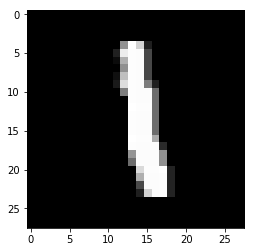

In [8]:
plt.imshow(x_train[6],cmap = 'gray')

In [14]:
x_train=x_train.reshape(-1 , 28*28)

In [15]:
x_test = x_test.reshape(-1,28*28)

In [16]:
x_test.shape

(10000, 784)

In [17]:
x_test.shape

(10000, 784)

In [18]:
x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

x_train = x_train/255.0

x_test = x_test/255.0

In [22]:
x_train[6]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
from keras.utils.np_utils import to_categorical

In [24]:
y_train_cat = to_categorical(y_train)

y_test_cat = to_categorical(y_test)

In [25]:
y_train_cat.shape

(60000, 10)

In [26]:
y_train[6]

1

In [27]:
y_train_cat[6]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [28]:
y_train_cat.shape

(60000, 10)

In [29]:
y_test_cat.shape

(10000, 10)

In [30]:
from keras.models import Sequential

from keras.layers import Dense

import keras.backend as K



In [32]:
K.clear_session()

model = Sequential()

model.add(Dense(512 , input_dim = 28*28 , activation = 'relu'))

model.add(Dense(256,activation = 'relu'))

model.add(Dense(128,activation = 'relu'))

model.add(Dense(32,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'rmsprop' , metrics = ['accuracy'])

In [33]:
h = model.fit(x_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 9s 207us/step - loss: 0.3404 - acc: 0.8931 - val_loss: 0.2682 - val_acc: 0.9227
Epoch 2/10
42000/42000 [==============================] - 8s 179us/step - loss: 0.1135 - acc: 0.9658 - val_loss: 0.1116 - val_acc: 0.9672
Epoch 3/10
42000/42000 [==============================] - 8s 179us/step - loss: 0.0751 - acc: 0.9771 - val_loss: 0.0999 - val_acc: 0.9712
Epoch 4/10
42000/42000 [==============================] - 7s 178us/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.1618 - val_acc: 0.9583
Epoch 5/10
42000/42000 [==============================] - 7s 177us/step - loss: 0.0410 - acc: 0.9870 - val_loss: 0.1207 - val_acc: 0.9708
Epoch 6/10
42000/42000 [==============================] - 7s 177us/step - loss: 0.0300 - acc: 0.9910 - val_loss: 0.1473 - val_acc: 0.9682
Epoch 7/10
42000/42000 [==============================] - 7s 177us/step - loss: 0.0251 - acc: 0.9917 - val_loss: 0.1461 - 

Text(0.5,0,'Epochs')

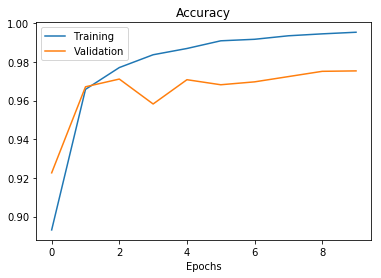

In [34]:
plt.plot(h.history['acc'])

plt.plot(h.history['val_acc'])

plt.legend(['Training', 'Validation'])

plt.title('Accuracy')

plt.xlabel('Epochs')

In [36]:
test_accuracy = model.evaluate(x_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 1s 91us/step


0.9789

In [37]:
x_train.shape

(60000, 784)

In [39]:
x_train = x_train.reshape(-1 , 28 ,28,1)

x_test = x_test.reshape(-1 , 28 , 28 ,1)

In [40]:
x_train.shape

(60000, 28, 28, 1)

In [46]:
from keras.layers import Flatten , Activation ,Conv2D ,MaxPool2D

In [50]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, input_dim = 28*28 , activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
__________

In [58]:
h = model.fit(x_train, y_train_cat, batch_size=25, epochs=2, verbose=1, validation_split=0.4)

Train on 36000 samples, validate on 24000 samples
Epoch 1/2
36000/36000 [==============================] - 54s 1ms/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0829 - val_acc: 0.9905
Epoch 2/2
36000/36000 [==============================] - 53s 1ms/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.0943 - val_acc: 0.9905


In [59]:
test_accuracy = model.evaluate(x_test, y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 4s 393us/step


0.9898